In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv(r"C:\Users\akhil\OneDrive\Desktop\Machine_learning\knn2\heart.csv")

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
df.duplicated().sum()

723

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

outlier

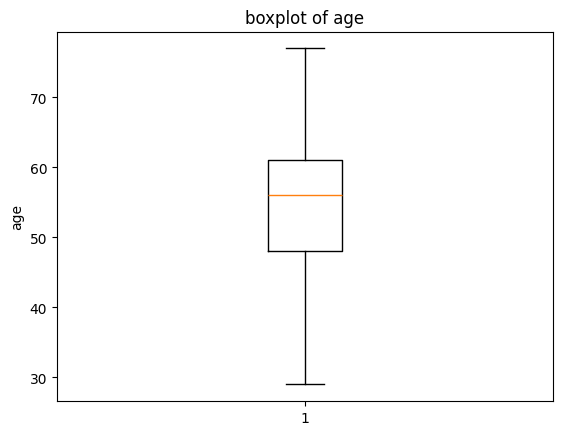

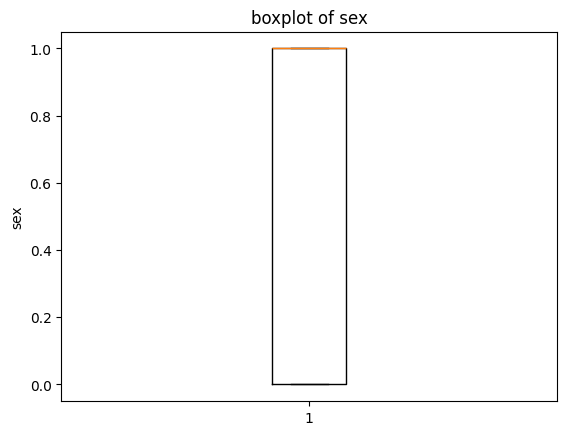

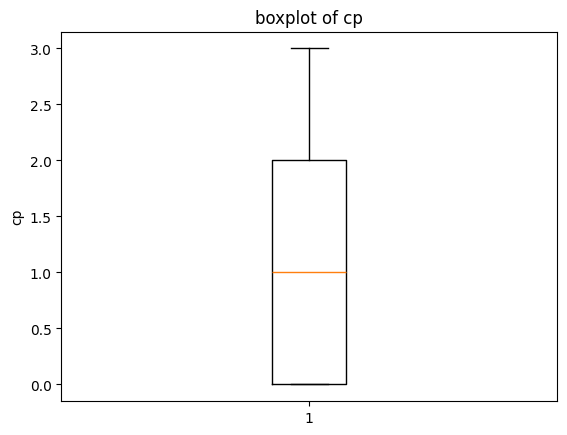

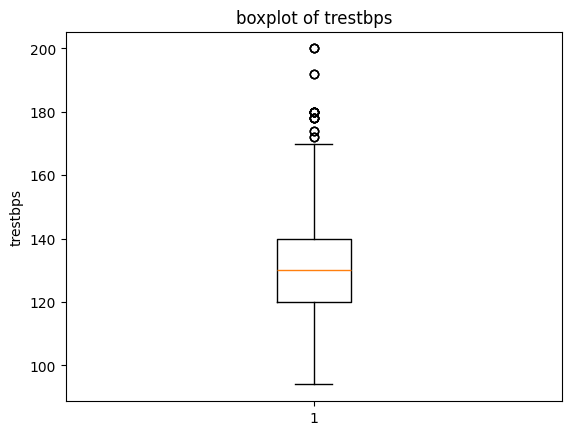

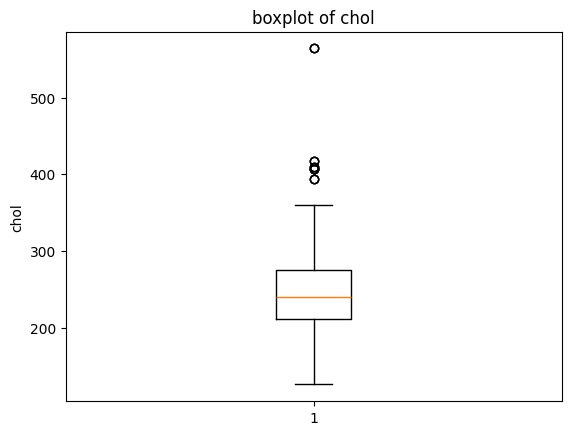

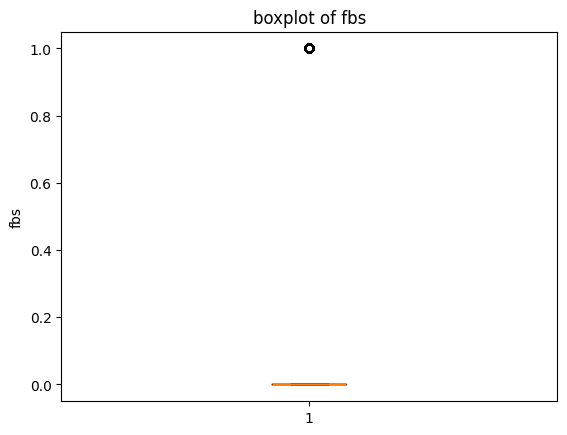

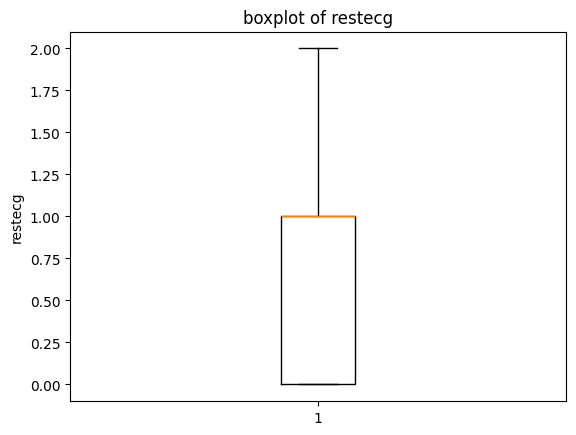

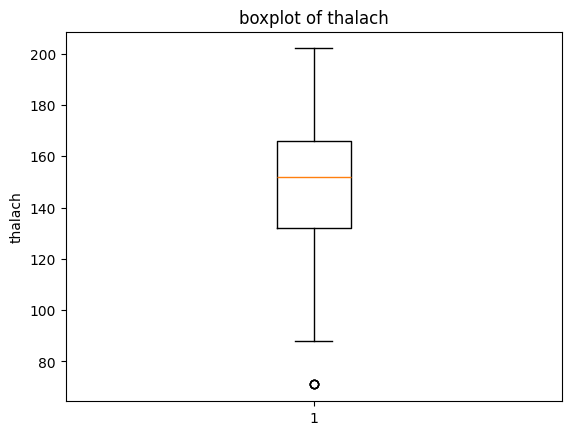

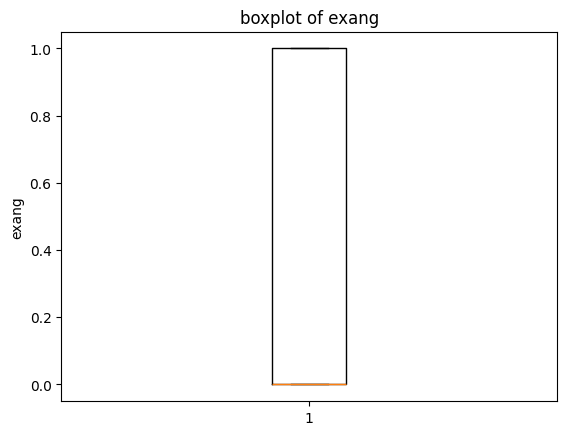

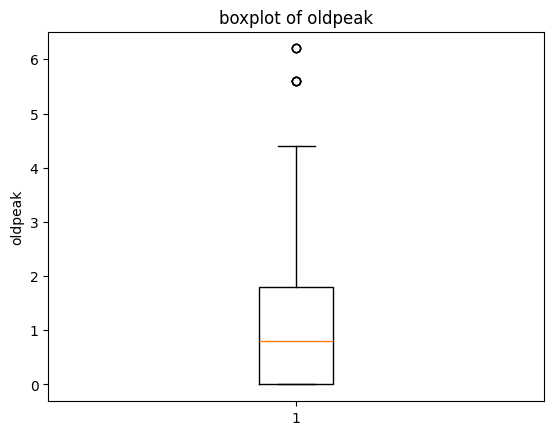

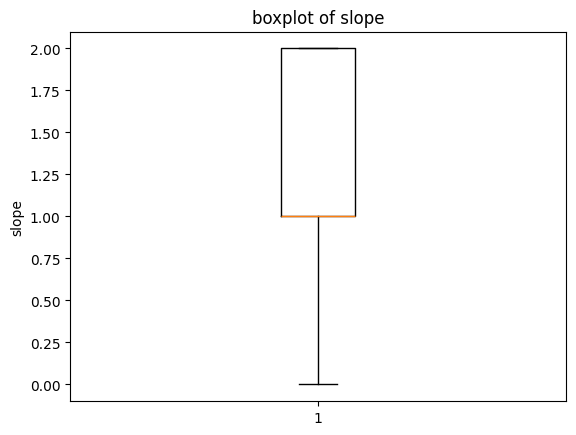

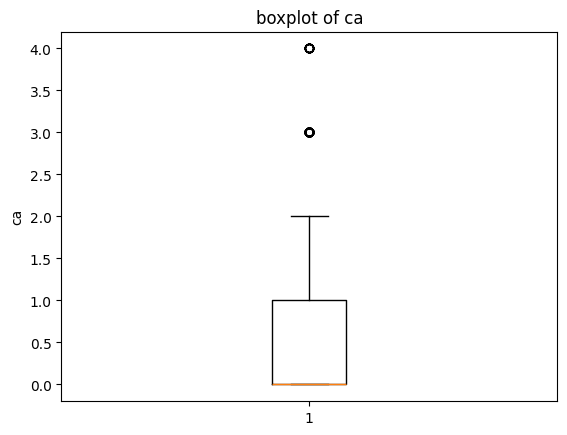

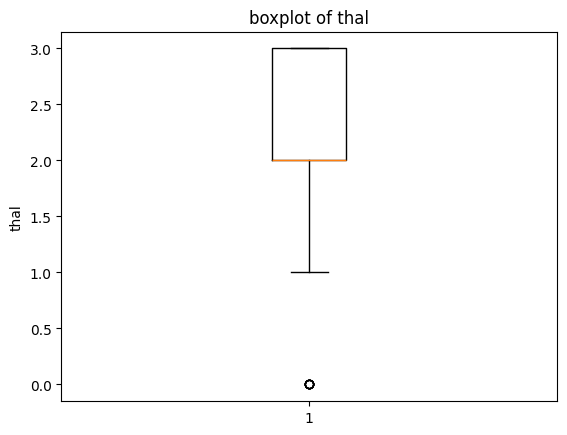

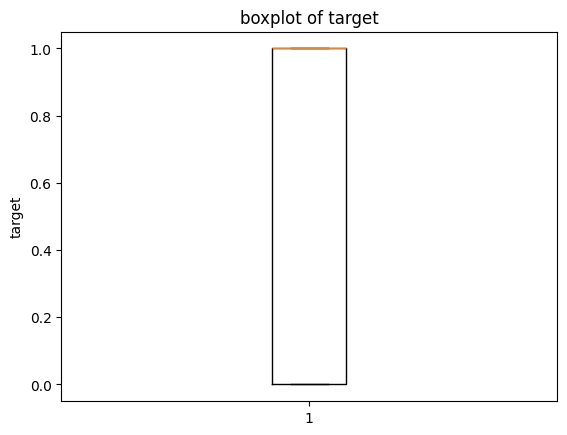

In [11]:
for i in df:
    plt.boxplot(df[i])
    plt.title(f'boxplot of {i}')
    plt.ylabel(i)
    plt.show()

IQR

In [12]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [13]:
for i in df:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    min_range=q1-1.5*IQR
    max_range=q3+1.5*IQR
    print(i)
    print(f'Lower Bound (Min) for outliers: {min_range}')
    print(f'Upper Bound (Max) for outliers: {max_range}')
    print('------------------------')

age
Lower Bound (Min) for outliers: 28.5
Upper Bound (Max) for outliers: 80.5
------------------------
sex
Lower Bound (Min) for outliers: -1.5
Upper Bound (Max) for outliers: 2.5
------------------------
cp
Lower Bound (Min) for outliers: -3.0
Upper Bound (Max) for outliers: 5.0
------------------------
trestbps
Lower Bound (Min) for outliers: 90.0
Upper Bound (Max) for outliers: 170.0
------------------------
chol
Lower Bound (Min) for outliers: 115.0
Upper Bound (Max) for outliers: 371.0
------------------------
fbs
Lower Bound (Min) for outliers: 0.0
Upper Bound (Max) for outliers: 0.0
------------------------
restecg
Lower Bound (Min) for outliers: -1.5
Upper Bound (Max) for outliers: 2.5
------------------------
thalach
Lower Bound (Min) for outliers: 81.0
Upper Bound (Max) for outliers: 217.0
------------------------
exang
Lower Bound (Min) for outliers: -1.5
Upper Bound (Max) for outliers: 2.5
------------------------
oldpeak
Lower Bound (Min) for outliers: -2.7
Upper Bound (Ma

scaling

In [14]:
x=df.drop(columns=['target'])
y=df['target']

In [15]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)
x_scaled


array([[0.47916667, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.4375    , 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.52083333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ]])

In [16]:
x_scaled.sum()

5477.738665588531

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [18]:
test=[[52,1,0,125,212,0,1,168,0,1.0,2,2,3]]
minmax.transform(test)

c:\Users\akhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.47916667, 1.        , 0.        , 0.29245283, 0.19634703,
        0.        , 0.5       , 0.74045802, 0.        , 0.16129032,
        1.        , 0.5       , 1.        ]])

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


splitting

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=5)

In [21]:
x_train.shape
# x_test.shape

(717, 13)

In [22]:
x_test.shape

(308, 13)

KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)


KNeighborsClassifier()

In [31]:
from sklearn.svm import SVC


In [33]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [24]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,

In [25]:
y_test

293    1
697    0
353    1
481    0
823    1
      ..
913    1
872    1
556    0
492    0
573    0
Name: target, Length: 308, dtype: int64

In [34]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,2))

86.04


In [27]:
test=[[52,1,0,125,212,0,1,168,0,1.0,2,2,3]]
minmax.transform(test)
test_pred=model.predict(test)
test_pred

c:\Users\akhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [28]:
if test_pred[0]==0:
    print('no chances of heart attack')
else:
    print('chances of heart attack')

no chances of heart attack


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
models=[KNeighborsClassifier(),SVC()]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(model)
    print("___________________________________")
    print(accuracy_score(y_test,y_pred)*100)
    print()

KNeighborsClassifier()
___________________________________
86.03896103896103

SVC()
___________________________________
88.96103896103897



#precision
#recall
#fiscore

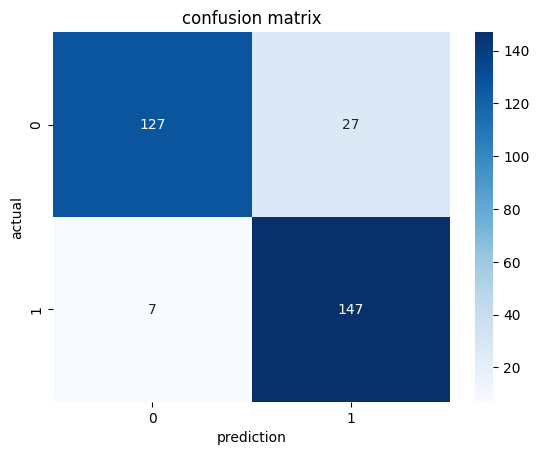

[[127  27]
 [  7 147]]


In [40]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns 
sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",cmap="Blues",annot=True)
plt.title("confusion matrix")
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()
print(confusion_matrix(y_test,y_pred))
